# 함수형 모델 (다대일)
* 100개의 데이터씩 2개의 컬럼이 입력되어, 100개의 데이터 1개가 출력되는 구조 
* Input과 Output의 shape만 조절하면 가능

## 0 사용할 패키지 불러오기 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import random

from sklearn.model_selection import train_test_split  # 데이터 분리를 위해 사용 

## 1. 데이터셋 생성하기
* 2행 100 열로 된 데이터 --> 100행에 2열 데이터로 변환 
* 학습 데이터 
* __검증 데이터__
* 테스트 데이터
* 사이킷 런에 잘 구현된 __train_test_split 함수__ 를 이용해서 데이터를 효율적으로 잘라냄 
    - test_size=0.4 : 테스트 사이즈가 40%라는 의미 (train : 60%, test : 40%)
    - suffle : 데이터를 섞을 것인지 선택 - 일반적으로 shuffule을 사용하면 결과가 더 좋음 
* train : val : test - 6:2:2 로 설정  

In [2]:
x = np.array([range(100), range(301, 401)])
y = np.array(range(201, 301))

x = np.transpose(x)

print(x.shape)

# 학습 데이터와 테스트 데이터 분리하기 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=66, test_size=0.4, shuffle=False)

# 검증 데이터와 테스트 데이터 분리하기 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=66, test_size=0.5)

(100, 2)


## 2. 모델 구성하기
* Dense 레이어가 두 개인 다층퍼셉트론 모델. 
* 첫 번째 레이어는 5개의 뉴런을 가진 Dense 레이어
    - 오류역전파가 용이한 relu 활성화 함수를 사용.
* 두 번째 레이어는 3개의 뉴런을 가진 Dense 레이어 
* 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수는 relu를 사용

In [3]:
model = Sequential()

model.add(Dense(5, input_shape = (2, ), activation ='relu'))
model.add(Dense(3))
model.add(Dense(4))
model.add(Dense(1))  # 출력 1

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정하기
#### 모델 컴파일
* 모델을 실행시키지 전에 머신이 이해할 수 있도록 컴파일 시킴
* loss : 손실 마수는 어떤 것을 사용할 것인가? --> mse
* optimizer : 최적화 함수는? --> adam, rmsprop
* metrics : 어떤 방식? --> accuracy, mse(mean squared error) 적용 

In [4]:
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

## 4. 모델 학습시키기
* epochs : 훈련 횟수
* batch_size : 몇 개씩 끊어서 작업을 할 것인가를 의미 
    - batch_size를 크게 잡을 경우 속도가 빨라지지만 정확도가 떨어짐
    - 작게 잡을 경우 속도는 떨어지지만 정확도는 올라감
* valication_data : 검증 데이터 

In [5]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=1,validation_data = (x_val, y_val))

Train on 60 samples, validate on 20 samples
Epoch 1/300
60/60 [==============================] - 1s 10ms/sample - loss: 28628.7711 - mse: 28628.7695 - val_loss: 7261.3139 - val_mse: 7261.3140
Epoch 2/300
60/60 [==============================] - 0s 2ms/sample - loss: 2731.7915 - mse: 2731.7917 - val_loss: 892.8692 - val_mse: 892.8693
Epoch 3/300
60/60 [==============================] - 0s 2ms/sample - loss: 222.9558 - mse: 222.9558 - val_loss: 1413.1822 - val_mse: 1413.1823
Epoch 4/300
60/60 [==============================] - 0s 2ms/sample - loss: 199.3082 - mse: 199.3082 - val_loss: 1368.1458 - val_mse: 1368.1459
Epoch 5/300
60/60 [==============================] - 0s 2ms/sample - loss: 191.4921 - mse: 191.4920 - val_loss: 1548.0879 - val_mse: 1548.0880
Epoch 6/300
60/60 [==============================] - 0s 2ms/sample - loss: 189.7715 - mse: 189.7715 - val_loss: 1134.7624 - val_mse: 1134.7625
Epoch 7/300
60/60 [==============================] - 0s 2ms/sample - loss: 176.2683 - mse: 17

60/60 [==============================] - 0s 2ms/sample - loss: 0.7338 - mse: 0.7338 - val_loss: 5.0104 - val_mse: 5.0104
Epoch 60/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.6071 - mse: 0.6071 - val_loss: 7.0773 - val_mse: 7.0773
Epoch 61/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.4665 - mse: 0.4665 - val_loss: 1.5317 - val_mse: 1.5317
Epoch 62/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.4437 - mse: 0.4437 - val_loss: 2.7629 - val_mse: 2.7629
Epoch 63/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.3064 - mse: 0.3064 - val_loss: 2.6219 - val_mse: 2.6219
Epoch 64/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.3152 - mse: 0.3152 - val_loss: 1.7317 - val_mse: 1.7317
Epoch 65/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.2144 - mse: 0.2144 - val_loss: 2.2016 - val_mse: 2.2016
Epoch 66/300
60/60 [==============================] - 0s 2ms/sample - loss:

60/60 [==============================] - 0s 2ms/sample - loss: 4.8118e-10 - mse: 4.8118e-10 - val_loss: 5.1223e-10 - val_mse: 5.1223e-10
Epoch 117/300
60/60 [==============================] - 0s 2ms/sample - loss: 4.2298e-10 - mse: 4.2298e-10 - val_loss: 3.2596e-10 - val_mse: 3.2596e-10
Epoch 118/300
60/60 [==============================] - 0s 2ms/sample - loss: 3.8417e-10 - mse: 3.8417e-10 - val_loss: 5.5879e-10 - val_mse: 5.5879e-10
Epoch 119/300
60/60 [==============================] - 0s 2ms/sample - loss: 3.6865e-10 - mse: 3.6865e-10 - val_loss: 8.8476e-10 - val_mse: 8.8476e-10
Epoch 120/300
60/60 [==============================] - 0s 2ms/sample - loss: 3.5701e-10 - mse: 3.5701e-10 - val_loss: 7.4506e-10 - val_mse: 7.4506e-10
Epoch 121/300
60/60 [==============================] - 0s 2ms/sample - loss: 4.3462e-10 - mse: 4.3462e-10 - val_loss: 1.7695e-09 - val_mse: 1.7695e-09
Epoch 122/300
60/60 [==============================] - 0s 2ms/sample - loss: 2.9880e-10 - mse: 2.9880e-10 - 

60/60 [==============================] - 0s 2ms/sample - loss: 3.5119e-09 - mse: 3.5119e-09 - val_loss: 1.3039e-09 - val_mse: 1.3039e-09
Epoch 171/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.6686e-08 - mse: 1.6686e-08 - val_loss: 3.4506e-08 - val_mse: 3.4506e-08
Epoch 172/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.8052e-08 - mse: 1.8052e-08 - val_loss: 1.2806e-07 - val_mse: 1.2806e-07
Epoch 173/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.4505e-08 - mse: 1.4505e-08 - val_loss: 1.2107e-09 - val_mse: 1.2107e-09
Epoch 174/300
60/60 [==============================] - 0s 2ms/sample - loss: 3.3295e-09 - mse: 3.3295e-09 - val_loss: 6.9384e-09 - val_mse: 6.9384e-09
Epoch 175/300
60/60 [==============================] - 0s 2ms/sample - loss: 2.5670e-08 - mse: 2.5670e-08 - val_loss: 4.3772e-09 - val_mse: 4.3772e-09
Epoch 176/300
60/60 [==============================] - 0s 2ms/sample - loss: 5.3784e-09 - mse: 5.3784e-09 - 

60/60 [==============================] - 0s 2ms/sample - loss: 1.6148e-07 - mse: 1.6148e-07 - val_loss: 2.7148e-08 - val_mse: 2.7148e-08
Epoch 226/300
60/60 [==============================] - 0s 2ms/sample - loss: 3.7769e-08 - mse: 3.7769e-08 - val_loss: 3.6010e-07 - val_mse: 3.6010e-07
Epoch 227/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.0485e-06 - mse: 1.0485e-06 - val_loss: 2.3656e-08 - val_mse: 2.3656e-08
Epoch 228/300
60/60 [==============================] - 0s 2ms/sample - loss: 2.4520e-07 - mse: 2.4520e-07 - val_loss: 2.0093e-07 - val_mse: 2.0093e-07
Epoch 229/300
60/60 [==============================] - 0s 2ms/sample - loss: 2.2457e-07 - mse: 2.2457e-07 - val_loss: 2.5016e-06 - val_mse: 2.5016e-06
Epoch 230/300
60/60 [==============================] - 0s 2ms/sample - loss: 7.0046e-06 - mse: 7.0046e-06 - val_loss: 7.3333e-05 - val_mse: 7.3333e-05
Epoch 231/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.9921e-04 - mse: 1.9921e-04 - 

60/60 [==============================] - 0s 2ms/sample - loss: 2.4243e-05 - mse: 2.4243e-05 - val_loss: 1.8151e-06 - val_mse: 1.8151e-06
Epoch 282/300
60/60 [==============================] - 0s 2ms/sample - loss: 2.6130e-05 - mse: 2.6130e-05 - val_loss: 3.4593e-05 - val_mse: 3.4593e-05
Epoch 283/300
60/60 [==============================] - 0s 2ms/sample - loss: 2.7121e-05 - mse: 2.7121e-05 - val_loss: 3.5561e-06 - val_mse: 3.5561e-06
Epoch 284/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.1724e-05 - mse: 1.1724e-05 - val_loss: 1.5048e-06 - val_mse: 1.5048e-06
Epoch 285/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.3764e-06 - mse: 1.3764e-06 - val_loss: 3.5011e-06 - val_mse: 3.5011e-06
Epoch 286/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.4681e-06 - mse: 1.4681e-06 - val_loss: 2.5383e-07 - val_mse: 2.5383e-07
Epoch 287/300
60/60 [==============================] - 0s 2ms/sample - loss: 1.8219e-06 - mse: 1.8219e-06 - 

## 5. 학습과정 살펴보기

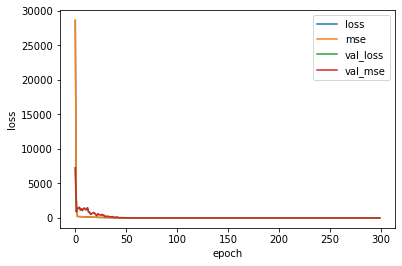

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_mse'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse', 'val_loss', 'val_mse'], loc='upper right')
plt.show()

## 6. 모델 평가하기

In [7]:
loss, mse = model.evaluate(x_test, y_test, batch_size =1)
print("loss : ", loss)
print("mse : ", mse )

20/20 [==============================] - 0s 2ms/sample - loss: 2.3330e-08 - mse: 2.3330e-08
loss :  2.3329630494117737e-08
mse :  2.332963e-08


## 7. 예측하기 

In [8]:
y_predict = model.predict(x_test)
print("결과물 : \n", y_predict)

결과물 : 
 [[264.99985]
 [279.99988]
 [290.9998 ]
 [265.99985]
 [261.99985]
 [295.99988]
 [263.99985]
 [288.99985]
 [291.99982]
 [299.99988]
 [292.99982]
 [285.99988]
 [284.99985]
 [277.99988]
 [269.99985]
 [274.99988]
 [268.99985]
 [272.99985]
 [283.99985]
 [296.99982]]


#### RMSE 구하기
* __평균 제곱근 오차 - RMSE(Root Mean Squared Error)__ 
    - 회귀 분석을 평가할 때 가장 많이 사용하는 지표 중에 하나
    - MSE에 루트를 사용
    - 원래 데이터에서 평균을 뺀 값을 제곱하여 모두 더한 뒤 전체 개수로 나눈 값에 루트를 씌운 것
    - RMSE는 낮을수록 정밀도가 높음

In [9]:
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE : ", RMSE(y_test, y_predict))

RMSE :  0.00015304496970361124


#### R2 구하기
* __결정 계수(R2)__
    - 회귀 분석에서 많이 사용하는 지표 중에 하나
    - RMSE와 반대로 높을수록 좋은 지표
    - 0~1사이의 수치 - 0.73 정도의 값이 나오면 73%의 설명력을 가진다고 해석 
    - 사이킷런에서 r2_score 함수로 제공 
    - 만약 R2의 값이 음수가 나오면 학습 시 머신에 뭔가 잘못된 부분이 존재한다는 의미 

In [10]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print("R2 : ", r2_y_predict)

R2 :  0.9999999998342192


#### 새로운 데이터로 예측 수행하기 
* x_predict에 새로운 값을 설정한 후 y_predict 값을 출력한다. 

In [11]:
x_predict = np.array([range(201, 211), range(411, 421)])
x_predict = np.transpose(x_predict)    # 입력 가능한 형태로 변환 
print(x_predict.shape)
y_predict = model.predict(x_predict)
print(y_predict)

(10, 2)
[[341.57175]
 [342.57178]
 [343.57175]
 [344.57175]
 [345.57178]
 [346.57172]
 [347.57178]
 [348.5718 ]
 [349.57175]
 [350.57175]]
